In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
import warnings
warnings.filterwarnings('ignore')

C:\Users\SRI\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [4]:
dfo = pd.read_excel('AIRLINE.xlsx')
dfo.head()

,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA,DATE,TOTAL_PASSENGERS,TOTAL_FREIGHT
0,2015,1,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,2015-01-31,533096.0,7506.928
1,2015,1,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,2015-01-31,212181.0,0.000
2,2015,1,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,2015-01-31,142324.0,2132.000
3,2015,1,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,2015-01-31,652969.0,9557.389
4,2015,1,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,2015-01-31,80350.0,115.680


In [19]:
# text=df['AIRLINE_NAME'].unique()
# text
text=['AIR INDIA', 'AIR INDIA EXPRESS', 'INDIGO', 'JET AIRWAYS',
       'SPICEJET', 'AEROFLOT', 'AEROLOGIC', 'AIR ARABIA',
       'AIR ASIA BERHAD', 'AIR AUSTRAL', 'AIR CHINA', 'AIR FRANCE',
       'AIR MANAS', 'AIR MAURITIUS', 'AIR ASTANA', 'AIR SEYCHELLES',
       'ALL NIPPON AIRWAYS', 'ARIANA AFGHAN', 'ASIANA AIRLINES',
       'AUSTRIAN AIRLINES', 'BANGKOK AIRWAYS', 'BHUTAN AIRLINES',
       'BIMAN BANGLADESH', 'BRITISH AIRWAYS', 'BUDHHA AIR',
       'CATHAY PACIFIC', 'CHINA AIRLINES LTD', 'CHINA EASTERN AIRLINES',
       'CHINA SOUTHERN ', 'DELTA AIRLINES', 'DRAGON AIR', 'DRUK AIR',
       'EGYPT AIR', 'EL-AL-ISRAEL', 'EMIRATES AIRLINE',
       'ETHIOPIAN AIRLINES', 'ETIHAD AIRLINES', 'EVA AIRWAYS',
       'FEDERAL EXPRESS', 'FINN AIR', 'FLY DUBAI', 'GULF AIR', 'IRAN AIR',
       'IRAQI AIRWAYS', 'ISLAND AVIATION SERVICES', 'JAPAN AIRLINES',
       'KALITTA AIR', 'KAM AIR', 'KENYA AIRWAYS', 'KLM AIRLINES',
       'KOREAN AIR', 'KUWAIT AIRWAYS', 'LUFTHANSA', 'MAHAN AIR',
       'MALAYSIA AIRLINES', 'MALINDO AIRWAYS', 'MARTIN AIR HOLLAND',
       'MIHIN LANKA', 'MYANMAR AIRLINES', 'NEPAL AIRLINES CORPORATION',
       'OMAN AIR', 'PAK INTERNATIONAL', 'QATAR AIRWATYS',
       'REGENT AIRWAYS', 'SAFI AIRWAYS', 'SAUDIA', 'SILK AIR',
       'SINGAPORE AIRLINES', 'SOUTHA AFRICAN AIRLINES',
       'SRILNKAN AIRWAYS', 'SWISS AIR', 'TAJIK AIR', 'THAI AIRWAYS',
       'TIGER AIRWAYS', 'TRANSAERO AIRLINES', 'TURKISH AIRLINES',
       'TURKMENISTAN AIRLINES', 'UNITED AIRLINES',
       'UNITED AIRLINES BANGLADESH LTD.', 'UNITED PARCEL SERVICES',
       'UZBEKISTAN AIRWAYS', 'VIRGIN ATLANTIC AIRLINES',
       'YEMENIA AIRWAYS', 'THAI AIR ASIA', 'AIR CANADA', 'QATAR AIRWAYS',
       'SCAT AIRLINES', 'SHANDONG AIRLINES', 'THOMAS AIRLINES U.K.',
       'AIR ASIA X', 'BUDDHA AIR', 'CARGOLUX AIRLINES INTERNATIONAL S.A.',
       'SCOOT PTE LTD.', 'MEGA MALDIVES AIRLINES', 'NOVO AIR',
       'ROSSIYA AIRLINES', 'THAI SMILE AIRWAYS', 'BRUSSELS AIRLINES',
       'GARUDA INDONESIA', 'US BANGLA AIRLINES', 'RWANDA AIR',
       'BATIK AIR', 'INDONESIA AIRASIA X', 'SCOOT TIGER AIR',
       'SRILANKAN AIRWAYS', 'RWANDAIR', 'THAI LION AIR',
       'THOMAS AIRLINES', 'GO AIR', 'FLYNAS']

In [20]:
text=''.join(text)

In [6]:
from wordcloud import WordCloud

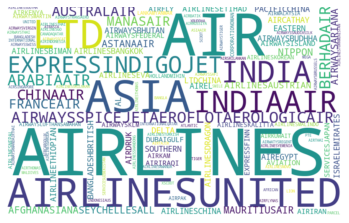

In [42]:
import matplotlib.pyplot as plt
#create the wordcloud object
wordcloud=WordCloud(background_color='white',collocations=False,width=800,height=500,margin=0).generate(text)
# wordcloud.recolor()
#display the generated image
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.savefig('wordcloud.png')
plt.show()


### FREIGHT FROM INDIA

In [20]:
dfi=dfo.groupby(['DATE'])['FREIGHT_FROM_INDIA'].sum()
# plt.show()
dfi=dfi.reset_index()
dfi['FREIGHT_FROM_INDIA'][11]=64000
dfi

,DATE,FREIGHT_FROM_INDIA
0,2015-01-31,72763.179000
1,2015-02-28,65478.423000
2,2015-03-31,75520.945500
3,2015-04-30,69767.427760
4,2015-05-31,72994.306290
5,2015-06-30,71952.194370
6,2015-07-31,71087.633520
7,2015-08-31,68385.570200
8,2015-09-30,65945.083400
9,2015-10-31,81603.122730


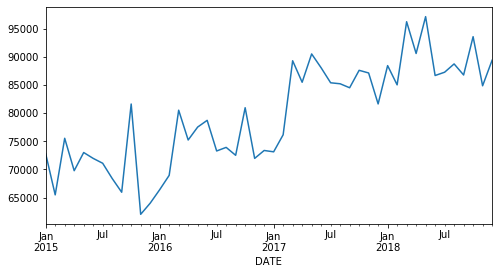

In [28]:
dfi.groupby(['DATE'])['FREIGHT_FROM_INDIA'].sum().plot()
plt.show()

In [18]:
# df.set_index(['DATE'],inplace=True)

In [21]:
pp =  dfi.groupby(['DATE'])['FREIGHT_FROM_INDIA'].sum()
pp_df = dfi.groupby(['DATE'])[['FREIGHT_FROM_INDIA']].sum()

In [23]:
pp_df.head()

,FREIGHT_FROM_INDIA
DATE,
2015-01-31,72763.17900
2015-02-28,65478.42300
2015-03-31,75520.94550
2015-04-30,69767.42776
2015-05-31,72994.30629


In [24]:
#GOT FREIGHT FROM INDIA VALUES FROM OFFICIAL SITE
test_data_F_from_india = [85607, 89924 , 99480 , 90472 , 90325 , 83980]

### Decomposition 

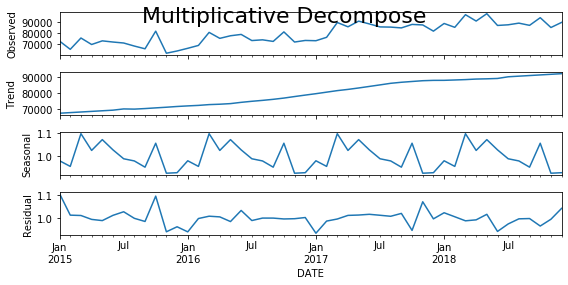

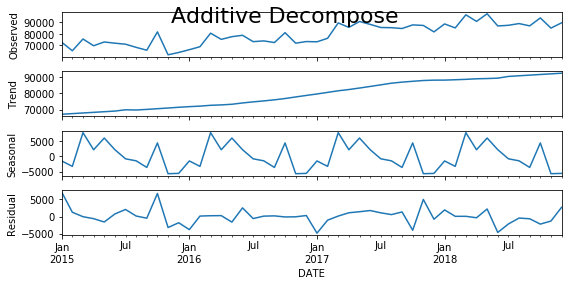

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(pp_df.dropna(), model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(pp_df.dropna(), model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,4)}) 
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22) 
result_add.plot().suptitle('Additive Decompose', fontsize=22) 
plt.show()

#### TEST FOR STATIONARITY ( ADF ) / ROLLING 

NULL HYPOTHESIS : NOT STATIONARY 

In [30]:
def test_stationarity(timeseries):
    
    rollmean_diff = timeseries.rolling(12).mean()
    rollstd_diff = timeseries.rolling(12).std()

    plt.figure(figsize=(8,4))
    plt.plot(timeseries)
    plt.plot(rollmean_diff)
    plt.plot(rollstd_diff,color='black')
    
    result = adfuller(timeseries['FREIGHT_FROM_INDIA'].dropna()) 
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1])

ADF Statistic: -0.826387
p-value: 0.811248


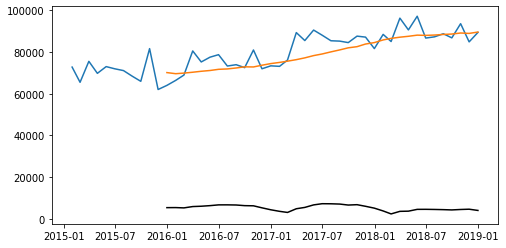

In [31]:
#ORIGINAL SERIES
test_stationarity(pp_df)

#### METHODS TO MAKE DATA STATIONARY

#### 1. LOG TRANSFORMATION

ADF Statistic: -0.841578
p-value: 0.806603


<Figure size 576x288 with 0 Axes>

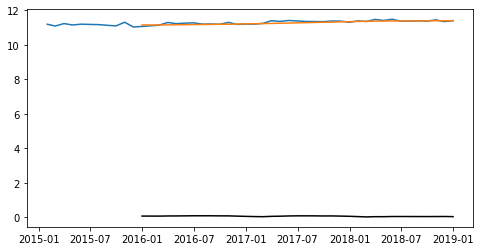

In [32]:
plt.figure(figsize=(8,4))
pp_df_log = np.log(pp_df)
test_stationarity(pp_df_log)

#### 2. Log Minus Weighted Average 

ADF Statistic: -1.924913
p-value: 0.320433


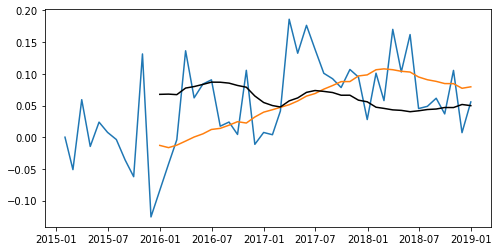

In [33]:
weightedAvg = pp_df_log.ewm(halflife=12).mean()

pp_df_log_weighted = pp_df_log - weightedAvg
pp_df_log_weighted.dropna(inplace=True)

test_stationarity(pp_df_log_weighted)

#### 3. Log Minus Moving Average 

ADF Statistic: -2.352355
p-value: 0.155638


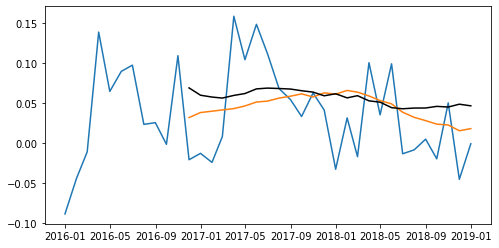

In [34]:
movingAvg = pp_df_log.rolling(12).mean()

pp_df_log_moving = pp_df_log - movingAvg
pp_df_log_moving.dropna(inplace=True)

test_stationarity(pp_df_log_moving)

#### 4. LOG Differencing 

ADF Statistic: -6.677062
p-value: 0.000000


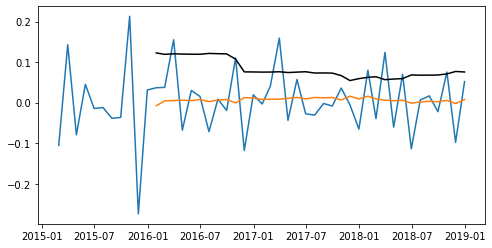

In [35]:
pp_df_log_diff = pp_df_log.diff()
pp_df_log_diff.dropna(inplace=True)

test_stationarity(pp_df_log_diff)

#### 5. Differencing 

ADF Statistic: -6.292632
p-value: 0.000000


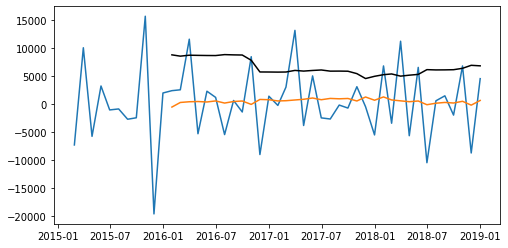

In [36]:
pp_df_diff = pp_df.diff()

test_stationarity(pp_df_diff)

### FINDING MODEL PARAMETERS (p,d,q)(P,D,Q)m

#### Finding - d

N-order Differencing 

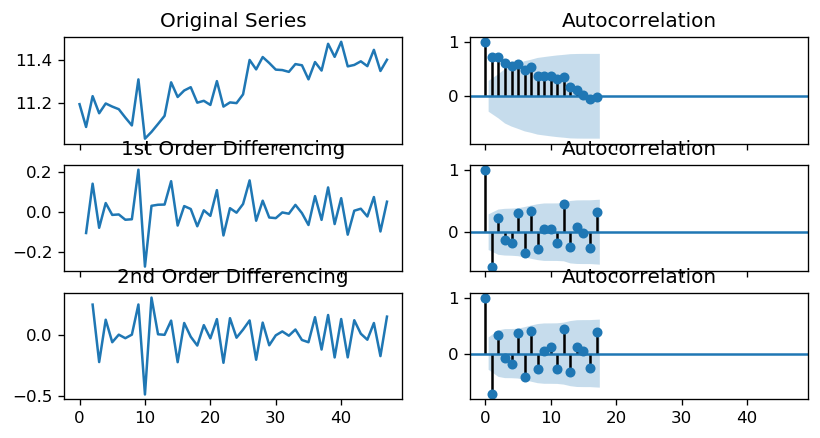

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(pp_df_log.values); axes[0, 0].set_title('Original Series') 
plot_acf(pp.values, ax=axes[0, 1])

axes[1, 0].plot(pp_df_log['FREIGHT_FROM_INDIA'].diff().values); axes[1, 0].set_title('1st Order Differencing') 
plot_acf(pp_df['FREIGHT_FROM_INDIA'].diff().dropna().values, ax=axes[1, 1])

axes[2, 0].plot(pp_df_log['FREIGHT_FROM_INDIA'].diff().diff().values); axes[2, 0].set_title('2nd Order Differencing') 
plot_acf(pp_df['FREIGHT_FROM_INDIA'].diff().diff().dropna().values, ax=axes[2, 1]) 
plt.show()

#### Finding - p and q

p - VALUE ( PARTIAL ) 

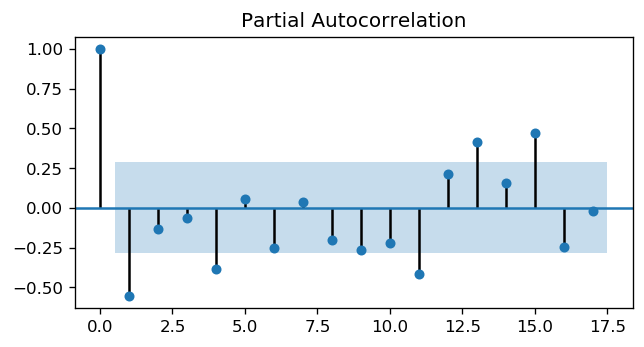

In [38]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plot_pacf(pp_df_log_diff.dropna())
plt.show()

q - VALUE (AUTOCORELATION)

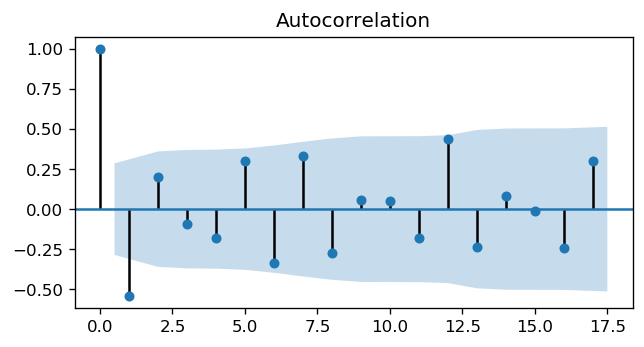

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plot_acf(pp_df_log_diff.dropna())

plt.show()

### ARIMA

In [40]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(pp_df_log.values, order=(1,1,0)) 

model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   47
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  58.177
Method:                       css-mle   S.D. of innovations              0.070
Date:                Mon, 13 Jan 2020   AIC                           -110.353
Time:                        12:16:47   BIC                           -104.803
Sample:                             1   HQIC                          -108.265
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0049      0.007      0.734      0.467      -0.008       0.018
ar.L1.D.y     -0.5542      0.122     -4.555      0.000      -0.793      -0.316
                                    Roots           

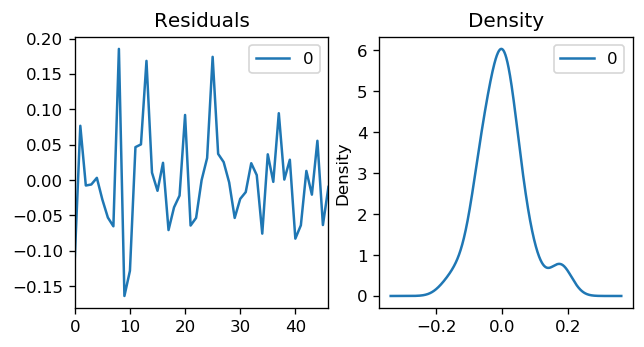

In [43]:
# Plot residual errors 
residuals = pd.DataFrame(model_fit.resid) 
fig, ax = plt.subplots(1,2) 
residuals.plot(title="Residuals", ax=ax[0]) 
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

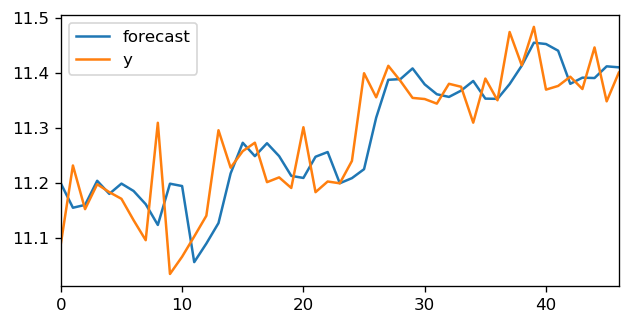

In [44]:
# Actual vs Fitted 
model_fit.plot_predict(dynamic=False)
plt.show()

In [105]:
test_data_F_from_india = [85607, 89924 , 99480 , 90472 , 90325 , 83980]

#### Jan-Jun 2019 FORECAST

In [101]:
np.exp(model_fit.forecast(6)[0])

array([87488.56504304, 89197.82816259, 88914.69756683, 89745.9175596 ,
       89960.36167565, 90521.71707872])

RMSE

In [112]:
np.sqrt(mean_squared_error(test_data_F_from_india,np.exp(model_fit.forecast(6)[0])))

6347.603890677521

### SARIMA

In [64]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(endog=pp_df_log.values,order=(0,1,1),seasonal_order=(0,1,0,12),trend='n',
                                enforce_invertibility=False , random_state=20)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                  52.853
Date:                            Mon, 13 Jan 2020   AIC                           -101.705
Time:                                    12:24:54   BIC                            -98.595
Sample:                                         0   HQIC                          -100.631
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6045      0.176     -3.427      0.001      -0.950      -0.259
sigma2         0.0028      0.001   

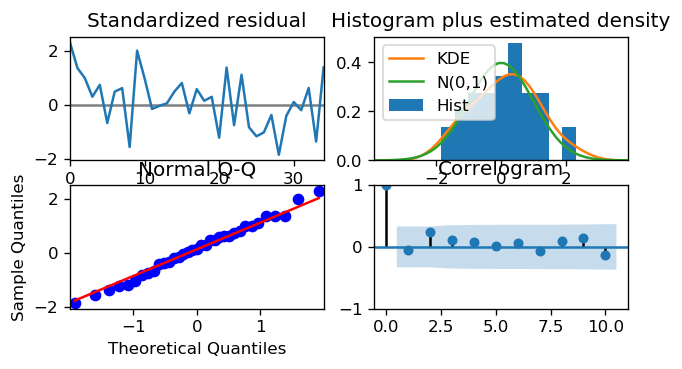

In [65]:
results.plot_diagnostics()
plt.show()

In [103]:
np.exp(results.forecast(6))

array([ 92617.71516036,  89042.48174382, 100779.81298043,  94873.44704774,
       101723.97636961,  90778.35576275])

In [110]:
test_data_F_from_india=[91800.56,89500.59,99480.23,93764.45,99567.12,88790.07]

(array([737060., 737241., 737425., 737607., 737791., 737972., 738156.,
        738337., 738521.]), <a list of 9 Text xticklabel objects>)

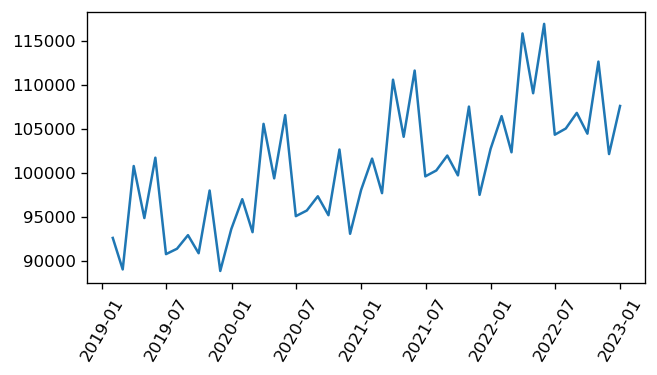

In [68]:
plt.plot(pd.date_range('2019-01-01', '2023-01-01',freq='M'),np.exp(results.forecast(48)))
plt.xticks(rotation=60)

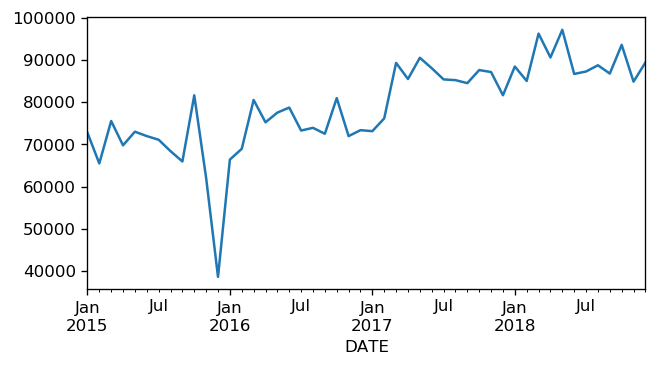

In [69]:
df.groupby(['DATE'])['FREIGHT_FROM_INDIA'].sum().plot()
plt.show()

RMSE

In [111]:
np.sqrt(mean_squared_error(test_data_F_from_india,np.exp(results.forecast(6))))

1437.6894529581637

MAE

In [78]:
mean_absolute_error(test_data_F_from_india,np.exp(results.forecast(12)))

2.637534635141492e-09

#### LJUNG-BOX TEST 

In [79]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(results.resid,lags=24)

(array([5.45056186e-03, 2.98071581e-02, 3.67338157e-02, 4.01443318e-02,
        4.05672574e-02, 4.16311710e-02, 4.16450759e-02, 4.19782666e-02,
        7.89173064e-02, 1.20359288e-01, 1.23823383e-01, 1.06188337e+01,
        1.06241682e+01, 1.06252180e+01, 1.06253325e+01, 1.06256988e+01,
        1.06259271e+01, 1.06283523e+01, 1.06283687e+01, 1.06283701e+01,
        1.06311743e+01, 1.06318589e+01, 1.06328316e+01, 1.06356668e+01]),
 array([0.94114731, 0.98520693, 0.99814802, 0.99980123, 0.99998262,
        0.99999852, 0.99999989, 0.99999999, 0.99999999, 0.99999999,
        1.        , 0.56183573, 0.6422695 , 0.71519469, 0.77867365,
        0.83197866, 0.8753364 , 0.90945723, 0.93570744, 0.95529666,
        0.96949683, 0.97961442, 0.98663134, 0.99138257]))

0.12047786659255995

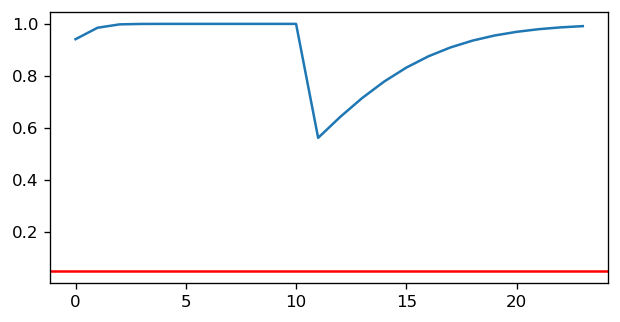

In [80]:
plt.plot(acorr_ljungbox(results.resid,lags=24)[1])
plt.axhline(0.050,color='r')

results.resid.mean()

### AUTO ARIMA 

In [57]:
from pmdarima.arima import auto_arima

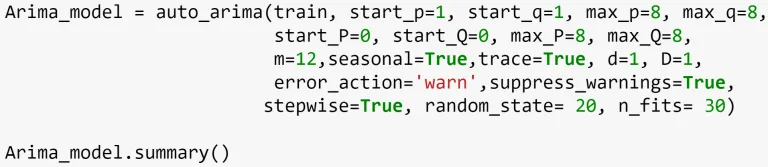


In [58]:
auto = auto_arima( pp_df_log.values , start_p=1 , start_q=1 , max_p=8 , max_q=8 ,\
                   start_P=0 , start_Q=0, max_P=9 , max_Q=8 ,
                   m=12 ,\
                   d=1 ,\
                  
                   D=1 , \
                   seasonal=True ,\
                   trace=True , stepwise=True ,\
                   error_action='warn' , suppress_warnings=True , random_state=20 , n_fits=100 , trend='ct')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-103.084, BIC=-95.307, Fit time=1.112 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-87.844, BIC=-83.178, Fit time=0.172 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-99.681, BIC=-91.904, Fit time=1.467 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-87.844, BIC=-83.178, Fit time=0.166 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-101.060, BIC=-91.728, Fit time=1.296 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-105.923, BIC=-99.701, Fit time=0.386 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-103.958, BI

In [59]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                  56.961
Date:                            Mon, 13 Jan 2020   AIC                           -105.923
Time:                                    12:21:40   BIC                            -99.701
Sample:                                         0   HQIC                          -103.775
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0217      0.007      3.225      0.001       0.009       0.035
drift         -0.0007      0.000     -3.497      0.000      -0.001      -0.000
ma.L1         -0.9308      0.190     -4.889      0.000      -1.304      -0.558
sigma2         0.0023      0.001      3.427      0.001       0.001       0.004
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.15
Prob(Q):                               nan   Prob(JB):                         0.93
Heteroskedasticity (H):               0.98   Skew:                            -0.14
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

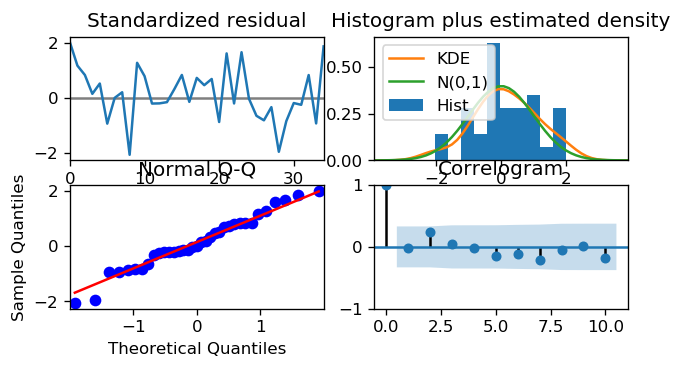

In [60]:
auto.plot_diagnostics()
plt.show()

Prediction

In [61]:
np.exp(auto.predict(12))

array([87948.66280431, 83379.83324076, 92992.81333787, 86201.74849128,
       90943.93955906, 79798.59982963, 78931.85825596, 78805.25277316,
       75607.35926394, 79931.25567474, 71010.29960573, 73230.28274039])

RMSE 

In [62]:
np.sqrt(mean_squared_error(test_data_F_from_india,np.exp(auto.predict(6))))

4591.57444967382

MAE

In [63]:
mean_absolute_error(test_data_F_from_india,np.exp(auto.predict(6)))

4073.934577304504

FORECAST FROM 2019-2026

In [93]:
f_from_india_forecast = pd.DataFrame({'DATE': pd.date_range('2019-01-01', '2026-01-01',freq='M') , 'FREIGHT_FROM_INDIA':list(np.exp(results.forecast(84)))})

In [95]:
f_from_india_forecast=round(f_from_india_forecast,3)
f_from_india_forecast.to_excel('f_from_india_forecast.xlsx')

---